# COVID Global Clustering Scratchpad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


## Clustering thoughts
- Take case + death counts
- Trending pattern (?  what is a good single value metric.. rolling 3 day or some momentum value?)
- Adding population data
- Population density ?
- Median age and age distributions

Attempt to cluster the countries ?


In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,China,Iran,Russia,...,Holy See,MS Zaandam,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-16,667592,184948,168941,147091,137698,104145,74193,83403,77995,27938,...,8,9,7,7,6,5,5,4,4,1
2020-04-17,699706,190839,172434,149130,141397,109769,78546,83760,79494,32008,...,8,9,7,7,6,5,5,4,4,1
2020-04-18,732197,191726,175925,149149,143342,115314,82329,83787,80868,36793,...,8,9,7,7,6,5,5,4,4,1
2020-04-19,759086,198674,178972,154097,145184,121172,86306,83805,82211,42853,...,8,9,7,7,6,5,5,4,4,1
2020-04-20,784326,200210,181228,156480,147065,125856,90980,83817,83505,47121,...,9,9,7,7,6,5,5,4,4,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,China,Iran,Russia,...,Holy See,MS Zaandam,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-17,32114.0,5891.0,3493.0,2039.0,3699.0,5624.0,4353.0,357.0,1499.0,4070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,32491.0,887.0,3491.0,19.0,1945.0,5545.0,3783.0,27.0,1374.0,4785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,26889.0,6948.0,3047.0,4948.0,1842.0,5858.0,3977.0,18.0,1343.0,6060.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,25240.0,1536.0,2256.0,2383.0,1881.0,4684.0,4674.0,12.0,1294.0,4268.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Rwanda,Saint Kitts and Nevis,Cambodia,South Sudan,Central African Republic,Saint Vincent and the Grenadines,Chad,Dominica,Sao Tome and Principe,Saint Lucia
2020-04-16,32916,22170,19315,17941,13759,4857,4869,4052,3346,3327,...,0,0,0,0,0,0,0,0,0,0
2020-04-17,36773,22745,20002,18703,14607,5163,4958,4352,4636,3471,...,0,0,0,0,0,0,0,0,0,0
2020-04-18,38664,23227,20043,19345,15498,5453,5031,4459,4636,3613,...,0,0,0,0,0,0,0,0,0,0
2020-04-19,40661,23660,20453,19744,16095,5683,5118,4586,4636,3697,...,0,0,0,0,0,0,0,0,0,0
2020-04-20,42094,24114,20852,20292,16550,5828,5209,4862,4636,3764,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Rwanda,Saint Kitts and Nevis,Cambodia,South Sudan,Central African Republic,Saint Vincent and the Grenadines,Chad,Dominica,Sao Tome and Principe,Saint Lucia
2020-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-17,3857.0,575.0,687.0,762.0,848.0,306.0,89.0,300.0,1290.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,1891.0,482.0,41.0,642.0,891.0,290.0,73.0,107.0,0.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,1997.0,433.0,410.0,399.0,597.0,230.0,87.0,127.0,0.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,1433.0,454.0,399.0,548.0,455.0,145.0,91.0,276.0,0.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Global Population Comparisons

In [408]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.sort_values(by=['Value'], ascending=False).head(), dfc_g.tail(1).transpose().count())  #262 countries / n countries
df_gmerged = pd.merge(left=dfc_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gpop_2016, on='Country/Region').rename(columns={'Value':'Population'})
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Cases" })

display(df_gmerged.rename(columns={'US':'United States'}).sort_values(by=['Population'], ascending=False).head())

df_gmerged = pd.merge(left=dfd_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gmerged, on='Country/Region')
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Deaths" })
       
display(df_gmerged.sort_values(by=['Population'], ascending=False).head(), df_gmerged.tail(1).transpose().count())



,Country/Region,Country Code,Year,Value
2711,World,WLD,2016,7426103221
1000,IDA & IBRD total,IBT,2016,6256138021
1531,Low & middle income,LMY,2016,6227752871
1885,Middle income,MIC,2016,5557635482
941,IBRD only,IBD,2016,4687686335


2020-04-20    185
dtype: int64

,Country/Region,Cases,Country Code,Year,Population
7,China,83817,CHN,2016,1378665000
14,India,18539,IND,2016,1324509589
0,United States,784326,USA,2016,322941311
32,Indonesia,6760,IDN,2016,261554226
8,Brazil,40743,BRA,2016,206163058


,Country/Region,Deaths,Cases,Country Code,Year,Population
7,China,4636,83817,CHN,2016,1378665000
17,India,592,18539,IND,2016,1324509589
0,United States,42094,784326,USA,2016,322941311
18,Indonesia,590,6760,IDN,2016,261554226
9,Brazil,2587,40743,BRA,2016,206163058


158    6
dtype: int64

## Add Population Density from worldbank

In [409]:
# population density source
# http://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv   
from zipfile import ZipFile
import requests, zipfile, io
import urllib.request

def get_zip(url):
    urllib.request.urlretrieve(url, "GDP.zip")
    compressed_file = zipfile.ZipFile('GDP.zip')
    files = compressed_file.namelist()
    for f in files:
        if (f.find('API') == 0):
            csv_file = compressed_file.open(f)  # pattern match how?
            return pd.read_csv(csv_file, header=2)
    return None

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def add_metric(indicator, colname, dfm, year='2019', debug=True):
    dfnew = get_zip('http://api.worldbank.org/v2/en/indicator/'+indicator+'?downloadformat=csv')
    dfnew = dfnew.fillna(method='ffill', axis=1)[['Country Code', year]].rename(columns={year:colname})

    dfm = pd.merge(left=dfm , right=dfnew, on ='Country Code') 
    display(dfm[dfm['Country/Region'].isin(['Dominica','Japan'])].head()) if debug else None

    dfm[colname] = dfm[colname].astype(str).apply(lambda x: float(x) if isfloat(x) else 0.0).round(2)
    return dfm


## Add demographics from worldbank

In [410]:
#  -- all available https://data.worldbank.org/indicator
#  API docs https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures
#
#   Examples:
# unemployment data http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# hospital beds http://api.worldbank.org/v2/en/indicator/SH.MED.BEDS.ZS?downloadformat=csv
# air flights http://api.worldbank.org/v2/en/indicator/IS.AIR.DPRT?downloadformat=csv
# rail lines http://api.worldbank.org/v2/en/indicator/IS.RRS.TOTL.KM?downloadformat=csv
# employment F http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.FE.ZS?downloadformat=csv
# employment M http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.MA.ZS?downloadformat=csv
# unemployment http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# urban pop% http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=csv
# pollution EN.ATM.PM25.MC.M3
# slum% indicator/ EN.POP.SLUM.UR.ZS

df_gmerged3 = df_gmerged.copy()  # df_gmerged2 no longer needed

df_gmerged3 = add_metric('IS.AIR.DPRT', 'flights', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.ATM.PM25.MC.M3', 'pollution', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SL.UEM.TOTL.ZS', 'unemp%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.MED.BEDS.ZS', 'hospbeds', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('IS.RRS.TOTL.KM', 'railways', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.URB.TOTL.IN.ZS', 'urbanpop%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.SLUM.UR.ZS', 'slum%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.DNST', 'popdensity%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('NY.GDP.PCAP.PP.CD', 'GDP/cap', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SE.ADT.LITR.ZS', 'literacy', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('FR.INR.DPST', 'deposit rate', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.DTH.COMM.ZS', 'COD disease', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.IMM.IDPT', 'DTP immunized', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.POP.65UP.TO.ZS', 'pop% >= 65', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('TG.VAL.TOTL.GD.ZS', 'trade%', df_gmerged3, year='2019', debug=False)


df_gmerged3 = df_gmerged3.sort_values(by='Cases', ascending=False).drop(columns=['Year'])

df_x = pd.concat([df_gmerged3.head(0), df_gmerged3[df_gmerged3['Country/Region'].isin(['Japan','Brazil','India'])]], axis=0)

display(df_gmerged3.shape, df_x[['Country/Region','Cases','flights','railways','hospbeds','popdensity%','pop% >= 65','pollution','GDP/cap','COD disease','urbanpop%','unemp%']].transpose())


(159, 20)

,9,17,27
Country/Region,Brazil,India,Japan
Cases,40743,18539,10797
flights,832683,1.20011e+06,999594
railways,32622,68443,16851.7
hospbeds,2.2,0.7,13.4
popdensity%,25.06,454.94,347.07
pop% >= 65,8.92,6.18,27.58
pollution,12.71,90.87,11.7
GDP/cap,16096.4,7762.88,42797.5
COD disease,13.9,26,12.7


In [411]:
display(df_gmerged3.shape, df_x[['Country/Region','Cases','flights','railways','hospbeds','popdensity%','pop% >= 65','pollution','GDP/cap','COD disease','urbanpop%','unemp%']].transpose())


(159, 20)

,9,17,27
Country/Region,Brazil,India,Japan
Cases,40743,18539,10797
flights,832683,1.20011e+06,999594
railways,32622,68443,16851.7
hospbeds,2.2,0.7,13.4
popdensity%,25.06,454.94,347.07
pop% >= 65,8.92,6.18,27.58
pollution,12.71,90.87,11.7
GDP/cap,16096.4,7762.88,42797.5
COD disease,13.9,26,12.7


In [412]:
# df_gmerged4 ready to go
df_gmerged4 = df_gmerged3.copy()
df_gmerged4[df_gmerged4['Country/Region'].isin(['Belarus','Poland','Spain','France','Sweden','India','Korea, South','Japan','United States','South Africa'])].transpose()


,0,2,3,17,12,27,25,52,50
Country/Region,United States,Spain,France,India,Sweden,Japan,Poland,Belarus,South Africa
Deaths,42094,20852,20292,592,1580,236,380,51,58
Cases,784326,200210,156480,18539,14777,10797,9593,6264,3300
Country Code,USA,ESP,FRA,IND,SWE,JPN,POL,BLR,ZAF
Population,322941311,46484062,66721256,1324509589,9923085,126994511,37970087,9501534,56203654
flights,9.87963e+06,641020,597412,1.20011e+06,190315,999594,123903,31676,180317
pollution,7.41,9.7,11.81,90.87,6.18,11.7,20.88,18.77,25.1
unemp%,3.68,13.96,8.43,5.36,6.48,2.29,3.47,4.59,28.18
hospbeds,2.9,3,6.5,0.7,2.6,13.4,6.5,11,2.8
railways,150462,15618,28241,68443,9708,16851.7,18536,5459,20953


# Correlation Matrix

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Deaths,1.000000,0.921638,0.179720,0.718720,-0.157080,0.018647,0.087149,0.699360,0.180221,-0.179033,-0.025884,0.249139,-0.202020,-0.117622,-0.160792,0.090646,0.308337,-0.077492
Cases,0.921638,1.000000,0.223738,0.879024,-0.127767,-0.012208,0.079027,0.824378,0.165953,-0.161618,-0.023874,0.247200,-0.203422,-0.086318,-0.150565,0.083324,0.249464,-0.089643
Population,0.179720,0.223738,1.000000,0.503798,0.267416,-0.049807,-0.036975,0.612453,-0.060774,0.009955,-0.017312,-0.042647,0.024591,-0.026367,-0.018070,0.029798,0.010736,-0.141224
flights,0.718720,0.879024,0.503798,1.000000,-0.055782,-0.070206,0.057644,0.910928,0.141160,-0.138750,-0.024821,0.222829,-0.182516,-0.089135,-0.146960,0.089789,0.181807,-0.101634
pollution,-0.157080,-0.127767,0.267416,-0.055782,1.000000,0.034698,-0.385119,-0.033383,-0.230348,0.477390,-0.100991,-0.172031,0.132855,0.111566,0.416183,-0.111487,-0.466812,-0.100274
unemp%,0.018647,-0.012208,-0.049807,-0.070206,0.034698,1.000000,-0.002011,-0.011623,0.120080,0.026280,-0.125099,-0.148474,0.237484,0.130979,0.009034,-0.098822,0.062347,-0.019466
hospbeds,0.087149,0.079027,-0.036975,0.057644,-0.385119,-0.002011,1.000000,0.138858,0.388271,-0.565877,0.332303,0.305930,-0.010130,-0.163978,-0.513351,0.295807,0.601188,0.223852
railways,0.699360,0.824378,0.612453,0.910928,-0.033383,-0.011623,0.138858,1.000000,0.142949,-0.172386,-0.042580,0.182165,-0.167972,-0.069401,-0.162519,0.078569,0.251617,-0.128805
urbanpop%,0.180221,0.165953,-0.060774,0.141160,-0.230348,0.120080,0.388271,0.142949,1.000000,-0.478795,0.181979,0.606855,-0.022595,-0.110195,-0.532877,0.334991,0.408456,0.181994
slum%,-0.179033,-0.161618,0.009955,-0.138750,0.477390,0.026280,-0.565877,-0.172386,-0.478795,1.000000,-0.113728,-0.551982,-0.078594,0.289491,0.799900,-0.276597,-0.605509,-0.244386


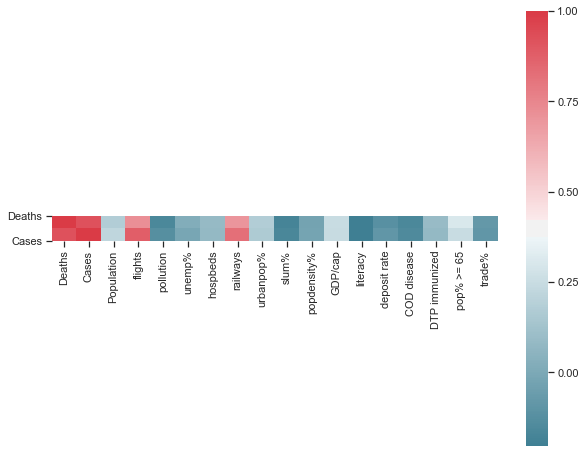

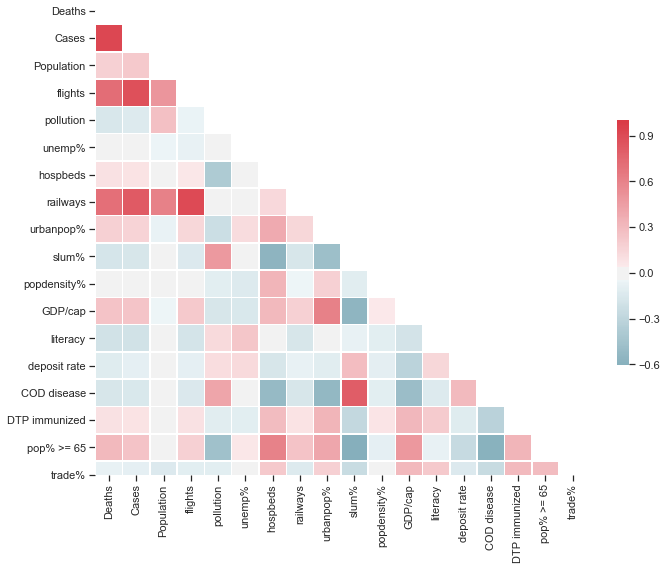

In [413]:
import seaborn as sns

df_corr = df_gmerged4.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.iloc[0:2,:], mask=np.zeros_like(df_corr.iloc[0:2,:], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_corr


## Scaling / Normalization

In [414]:
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
scaler = StandardScaler()

df_sc = df_gmerged4.copy().set_index('Country/Region').drop(columns=['Country Code'])
display('orig',df_sc.head(2))

df_sc = pd.DataFrame(scaler.fit_transform(df_sc), index=df_sc.index, columns=df_sc.columns)
display('scale',df_sc.head(2))

# df_sc = pd.DataFrame(scaler.inverse_transform(df_sc), index=df_sc.index, columns=df_sc.columns)
# display('inverse',df_sc.head(2))

'orig'

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
United States,42094,784326,322941311,9879630.0,7.41,3.68,2.9,150462.3,82.26,0.0,35.77,62794.59,0.00,0.0,5.2,94.0,15.81,20.83
Spain,20852,200210,46484062,641020.0,9.70,13.96,3.0,15618.0,80.32,0.0,93.53,39715.44,98.44,0.0,5.1,93.0,19.38,51.67


'scale'

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
United States,8.852050,11.271103,1.809402,10.876939,-1.012400,-0.533644,0.018517,9.518885,0.955201,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,4.273098,2.718223,0.026889,0.472386,-0.894881,1.370712,0.060101,0.686980,0.871687,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125


# Misc Clustering Techniques

## - Basic Template for KMeans

In [461]:
from sklearn.model_selection import train_test_split

df_train = df_sc.copy()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_train) # train on sample rows

display(f'kmeans info - inertia: {kmeans.inertia_}, iters: {kmeans.n_iter_}')    # training info 
display(f'labels: {kmeans.labels_}')                       # k-labels

def fl_col(df, f=3, l=9):  # print first 3 and last 2 cols together
    return pd.concat([df.iloc[:,0:f],df.iloc[:,-l:]], axis=1)
    
df_train.insert(0, 'cluster', kmeans.labels_)
display('train', fl_col(pd.concat([df_train.head(5),
                            df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])]])))
display(df_train[['cluster','Cases']].groupby(by=['cluster']).count())


'kmeans info - inertia: 1911.6278543066542, iters: 7'

'labels: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0\n 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2\n 0 0 2 2 0 0 0 0 2 0 2 2 0 2 2 0 2 2 0 2 0 0 0 2 0 0 0 2 2 0 2 2 2 2 0 0 2\n 2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 2 2 0\n 0 2 0 0 0 2 2 2 2 2 2]'

'train'

,cluster,Deaths,Cases,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,
United States,1,8.852050,11.271103,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,0,4.273098,2.718223,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125
Italy,0,4.976259,2.440281,-0.882278,-0.080319,0.893110,0.819156,-0.814337,-0.787174,0.461891,2.124220,-0.305249
France,0,4.152384,2.077910,-0.882278,-0.130833,1.047433,-1.967469,-0.635091,-0.734424,0.517655,1.712609,-0.446759
Germany,0,0.826273,1.940051,-0.882278,-0.060918,1.387199,-1.967469,-0.814337,-0.791969,0.350364,1.929007,0.301027
United States,1,8.852050,11.271103,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,0,4.273098,2.718223,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125
Italy,0,4.976259,2.440281,-0.882278,-0.080319,0.893110,0.819156,-0.814337,-0.787174,0.461891,2.124220,-0.305249
China,0,0.777557,1.013946,0.007618,-0.115024,-0.143651,0.753958,-0.473995,-0.839924,0.684946,0.334015,-0.757250


,Cases
cluster,
0,96
1,1
2,62


## - Basic Template for DBSCAN

I saw a presentation by Healy & McInnes on Youtube that basically said KMeans sucks, and we should use DBScan or their upgraded version HDBScan.   https://www.youtube.com/watch?v=ayZQj4llUSU&t=1824s


In [462]:
from sklearn.cluster import DBSCAN
import numpy as np

df_train = df_sc.copy()
clustering = DBSCAN(eps=3, min_samples=2).fit(df_train)
components = clustering.components_
labels =clustering.labels_
core_sample_indices = clustering.core_sample_indices_
display(f'model: {clustering}')
display(labels[0:10])

display(f'core_sample_indices_[0:10]: {core_sample_indices[0:10]}')
display(f'components_[0]: {components[0]}')    
display(f'labels/fit_predict[0:10]: {labels[0:10]}')                       

df_train.insert(0, 'cluster',clustering.labels_)
display('train2',pd.concat([fl_col(df_train).head(), 
                            fl_col(df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])])]))
display(df_train[['cluster','Cases']].groupby(by=['cluster']).count().rename(columns={'Cases':'Count'}))


"model: DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',\n       metric_params=None, min_samples=2, n_jobs=None, p=None)"

array([-1,  0,  0,  1, -1,  1,  2, -1,  3,  3], dtype=int64)

'core_sample_indices_[0:10]: [ 1  2  3  5  6  8  9 10 11 12]'

'components_[0]: [ 4.27309805  2.71822324  0.02688869  0.47238554 -0.89488095  1.37071175\n  0.06010084  0.68698041  0.87168744 -0.88227803 -0.1483439   0.80017278\n  0.79892219 -0.81433719 -0.77758298  0.35036395  1.61424593 -0.26612507]'

'labels/fit_predict[0:10]: [-1  0  0  1 -1  1  2 -1  3  3]'

'train2'

,cluster,Deaths,Cases,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,
United States,-1,8.852050,11.271103,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,0,4.273098,2.718223,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125
Italy,0,4.976259,2.440281,-0.882278,-0.080319,0.893110,0.819156,-0.814337,-0.787174,0.461891,2.124220,-0.305249
France,1,4.152384,2.077910,-0.882278,-0.130833,1.047433,-1.967469,-0.635091,-0.734424,0.517655,1.712609,-0.446759
Germany,-1,0.826273,1.940051,-0.882278,-0.060918,1.387199,-1.967469,-0.814337,-0.791969,0.350364,1.929007,0.301027
United States,-1,8.852050,11.271103,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,0,4.273098,2.718223,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125
Italy,0,4.976259,2.440281,-0.882278,-0.080319,0.893110,0.819156,-0.814337,-0.787174,0.461891,2.124220,-0.305249
China,-1,0.777557,1.013946,0.007618,-0.115024,-0.143651,0.753958,-0.473995,-0.839924,0.684946,0.334015,-0.757250


,Count
cluster,
-1,10
0,2
1,2
2,2
3,139
4,2
5,2


---

# Dimension Reduction

## - PCA Method

Most research tells us due to "Curse of Dimensionality" that you need to reduce dims before you run clustering.  Hence we redo.

[Text(0, 0.5, 'PCA3')]

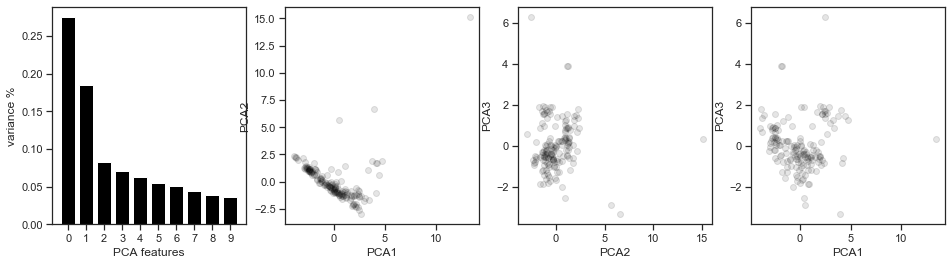

In [467]:
# method copied from kaggle: https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

plotX = df_sc.copy()

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(plotX)
PCA_components = pd.DataFrame(principalComponents, index=plotX.index)

# Plot the explained variances
features = range(pca.n_components_)

fig,ax = plt.subplots(1,4, figsize=(16,4))

ax[0].bar(features, pca.explained_variance_ratio_, color='black')
ax[0].set(xlabel = 'PCA features')
ax[0].set(ylabel = 'variance %')
ax[0].set(xticks = features)

ax[1].scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
ax[1].set(xlabel = 'PCA1')
ax[1].set(ylabel = 'PCA2')

ax[2].scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
ax[2].set(xlabel = 'PCA2')
ax[2].set(ylabel = 'PCA3')

ax[3].scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
ax[3].set(xlabel = 'PCA1')
ax[3].set(ylabel = 'PCA3')



## KMeans on PCA data

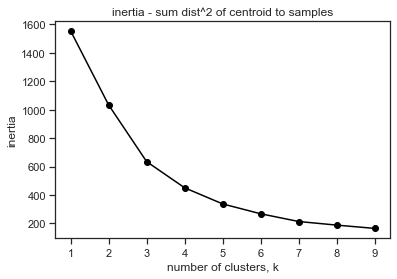

In [418]:
# KMeans on PCA columns
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.title('inertia - sum dist^2 of centroid to samples')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## KMeans Cluster Variants and Plots

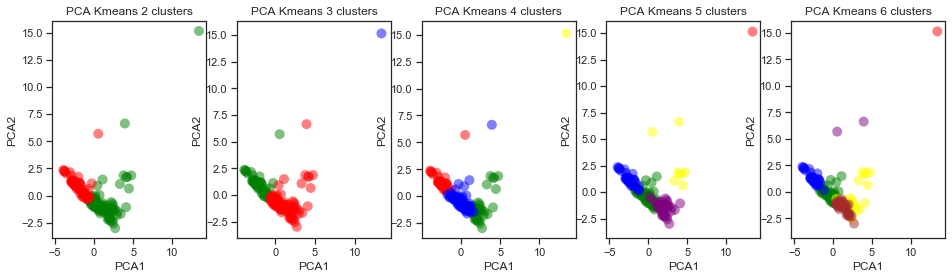

In [439]:
cluster_cases = [2,3,4,5,6]

fig,ax = plt.subplots(1,len(cluster_cases), figsize=(16,4))

for c,clusters in enumerate(cluster_cases):
    model = KMeans(n_clusters=clusters)
    PCA_components2 = PCA_components.copy()
    kmeans = model.fit(PCA_components2.iloc[:,:3])

    PCA_components2.insert(0, 'cluster', kmeans.labels_)

    datas = []
    for i in range(clusters):
        tup = []
        for j in range(clusters):
            tup.append(PCA_components2[PCA_components2['cluster']==i][j])
        datas.append(tup)

    groups = ['PCA'+str(i) for i in range(clusters)]
    colors = ('green','red','blue','yellow','purple','brown')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax[c].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[c].set_title(f'PCA Kmeans {clusters} clusters')
        ax[c].set(xlabel='PCA1')
        ax[c].set(ylabel='PCA2')
plt.show()

# hmm which one to pick?


## KMeans with Point Labels

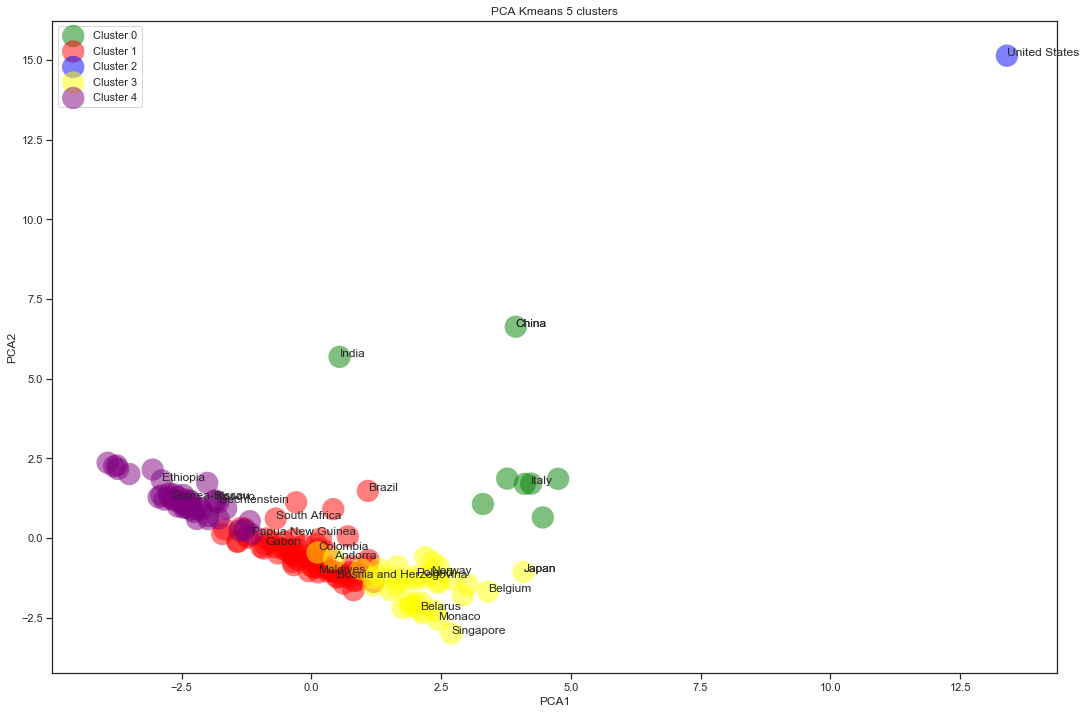

In [468]:
# zoom on n cluster solution
clusters=5

fig,ax = plt.subplots(figsize=(18,12))

model = KMeans(n_clusters=clusters)
PCA_components2 = PCA_components.copy()
kmeans = model.fit(PCA_components2.iloc[:,:3])

PCA_components2.insert(0, 'cluster', kmeans.labels_)

datas = []
for i in range(clusters):
    tup = []
    for j in range(clusters):
        tup.append(PCA_components2[PCA_components2['cluster']==i][j])
    datas.append(tup)

groups = ['Cluster '+str(i) for i in range(clusters)]
colors = ('green','red','blue','yellow','purple','brown')

for data,color,group in zip(datas,colors,groups):
    x,y = data[0],data[1]
    ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
    ax.set_title(f'PCA Kmeans {clusters} clusters')
    ax.set(xlabel='PCA1')
    ax.set(ylabel='PCA2')

for index,row in PCA_components2[PCA_components2.index.isin(['China','Japan','United States',
                                                             'Singapore','South Africa','Belarus','Brazil',
                                                             'Italy','India','Poland'])].iterrows():
    ax.annotate(index, (row[0],row[1]))
for index,row in PCA_components2.sample(15).iterrows():
    ax.annotate(index, (row[0],row[1]))

plt.legend(loc=2)
plt.show()


## -T-SNE Method (T-Distributed Stochastic Neighbor Embedding)

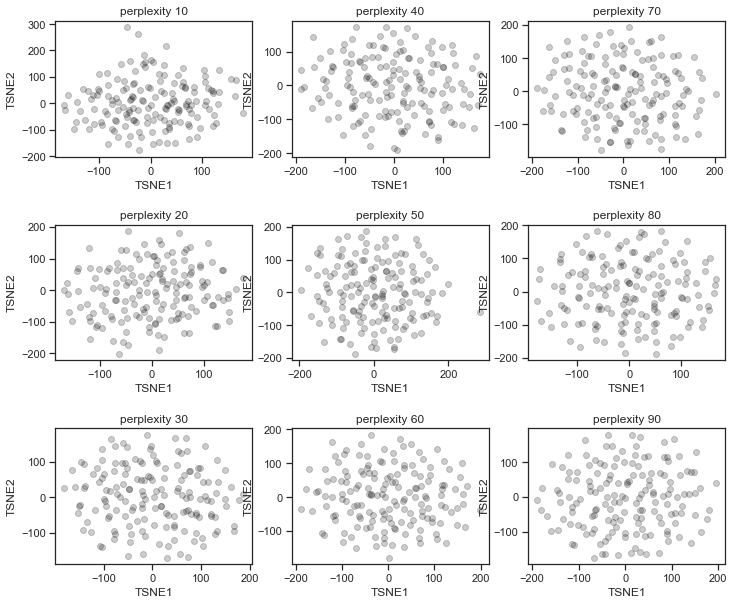

In [469]:
plotX = df_train.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3, 3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math 

# the search for ideal perplexity hyperameters...
for i, perplexity in enumerate(ps):
    tsne = TSNE(n_components=3, perplexity=perplexity)
    tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
    TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

    ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')


## Fixing TSNE HyperParams (Perplexity and Comps)

In [472]:
# pick perp 30 randomly, comps 3 -- no idea why
tsne_comps = 2
tsne_perp = 30
tsne = TSNE(n_components=tsne_comps, perplexity=tsne_perp)
tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)
TSNE_components.head()

,0,1
Country/Region,,
United States,4.002977,12.512072
Spain,3.986998,11.340963
Italy,3.973244,11.338212
France,3.250946,11.679252
Germany,1.411726,11.341841


## KMeans w/ TSNE

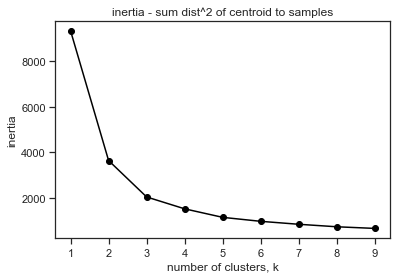

In [473]:
# KMeans on TSNE columns, search or the elbow ?
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(TSNE_components.iloc[:,:3])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.title('inertia - sum dist^2 of centroid to samples')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## KMeans on TSNE Cluster Analysis

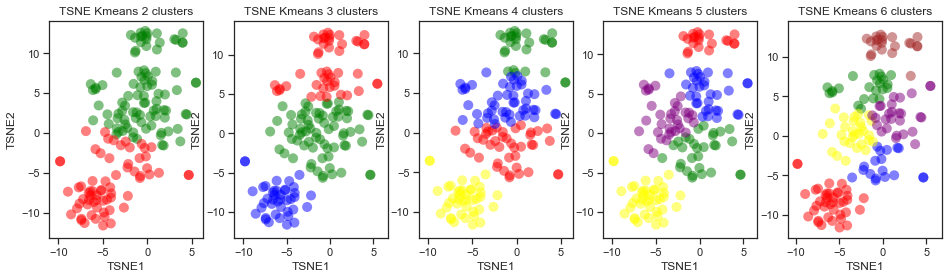

In [474]:
cluster_cases = [2,3,4,5,6]

fig,ax = plt.subplots(1,len(cluster_cases), figsize=(16,4))

for c,clusters in enumerate(cluster_cases):
    model = KMeans(n_clusters=clusters, random_state=57)
    TSNE_components2 = TSNE_components.copy()
    kmeans = model.fit(TSNE_components2.iloc[:,:3])
    TSNE_components2.insert(0, 'cluster', kmeans.labels_)

    datas = []
    for i in range(clusters):
        tup = []
        for j in range(tsne_comps):
            tup.append(TSNE_components2[TSNE_components2['cluster']==i][j])
        datas.append(tup)

    groups = ['TSNE'+str(i) for i in range(clusters)]
    colors = ('green','red','blue','yellow','purple','brown')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax[c].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[c].set_title(f'TSNE Kmeans {clusters} clusters')
        ax[c].set(xlabel='TSNE1')
        ax[c].set(ylabel='TSNE2')
plt.show()

# hmm which one to pick?

## KMeans on TSNE - Zoom with Labels

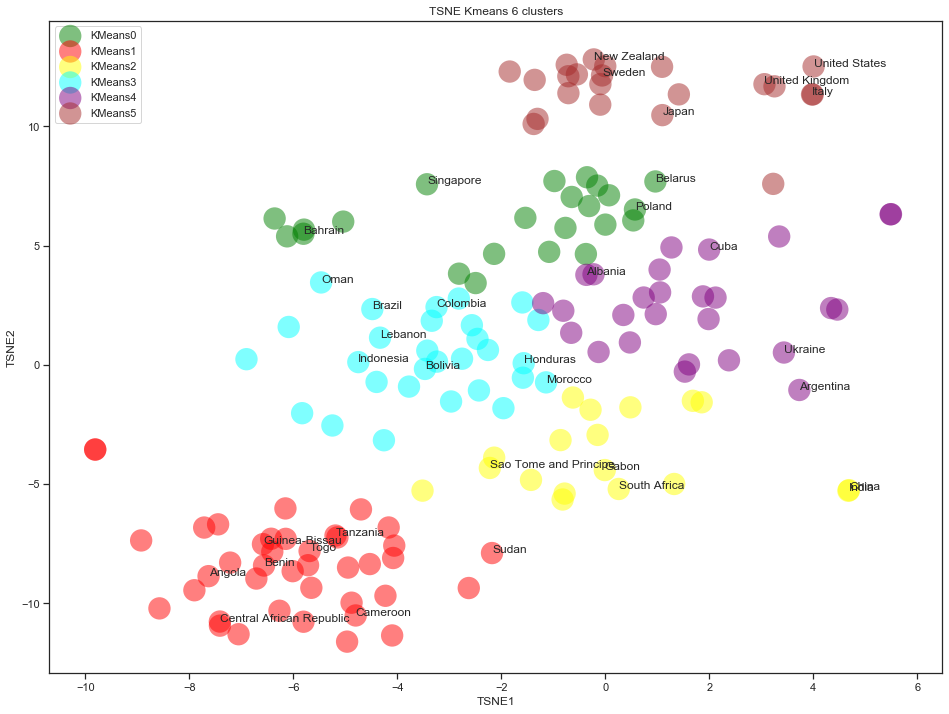

In [475]:
# try 6 clusters -- why i dunno, looks good... 
clusters = 6
model = KMeans(n_clusters=clusters, random_state=57)

fig,ax = plt.subplots(figsize=(16,12))

TSNE_components2 = TSNE_components.copy()
kmeans = model.fit(TSNE_components2.iloc[:,:3])
TSNE_components2.insert(0, 'cluster', kmeans.labels_)

datas = []
for i in range(clusters):
    tup = []
    for j in range(tsne_comps):
        tup.append(TSNE_components2[TSNE_components2['cluster']==i][j])
    datas.append(tup)

groups = ['KMeans'+str(i) for i in range(clusters)]
colors = ('green','red','yellow','cyan','purple','brown')

for data,color,group in zip(datas,colors,groups):
    x,y = data[0],data[1]
    ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
    ax.set_title(f'TSNE Kmeans {clusters} clusters')
    ax.set(xlabel='TSNE1')
    ax.set(ylabel='TSNE2')
    
for index,row in TSNE_components2[TSNE_components2.index.isin(['China','Japan','United States',
                                                             'Singapore','South Africa','Belarus','Brazil',
                                                             'Italy','India','Poland'])].iterrows():
    ax.annotate(index, (row[0],row[1]))
for index,row in TSNE_components2.sample(25).iterrows():
    ax.annotate(index, (row[0],row[1]))

plt.legend(loc=2)
plt.show()
